1. What is unsupervised learning in the context of machine learning?
-  Ans:- Unsupervised learning is a type of machine learning where the algorithm learns patterns and relationships in the data without prior knowledge of the target variable. The goal is to identify structure or meaning in the data.


2. How does K-Means clustering algorithm work?
- K-Means clustering works by:

    1. Initializing k centroids randomly.
    2. Assigning each data point to the closest centroid.
    3. Updating the centroids by calculating the mean of all data points assigned to each centroid.
    4. Repeating steps 2-3 until convergence.


3. What is the concept of a dendrogram in hierarchical clustering?
- Ans:- A dendrogram is a tree-like diagram that represents the hierarchical structure of clusters in the data. It shows the merging or splitting of clusters at different levels of similarity.



4. What is the main difference between K-Means and Hierarchical clustering?
-  K-Means is a partitional clustering algorithm that divides the data into k clusters, while Hierarchical clustering builds a hierarchy of clusters by merging or splitting existing clusters.



5. What are the advantages of DBSCAN over K-Means?
- Ans:- DBSCAN can handle clusters of varying densities and shapes, and it can identify noise points. K-Means is limited to spherical clusters and can be sensitive to outliers.


6. When would you use silhouette score in clustering?
-  Ans:- Silhouette score is used to evaluate the quality of clustering by measuring the separation between clusters and the cohesion within clusters.



7. What are the limitations of Hierarchical clustering?
- Ans:- Hierarchical clustering can be computationally expensive, and it can be difficult to determine the optimal number of clusters.


8. Why is feature scaling important in clustering algorithms like K-Means?
-  Ans:- Feature scaling is important because K-Means uses distance-based metrics, and features with large ranges can dominate the clustering process.


9. How does DBSCAN identify noise points?
- Ans:- DBSCAN identifies noise points by labeling points that do not belong to any cluster or are not within a certain density threshold.

10. Define inertia in the context of K-Means.
- Ans:- Inertia refers to the sum of squared distances between each data point and its assigned centroid.



11. What is the elbow method in K-Means clustering?
-  Ans;- The elbow method is a technique used to determine the optimal number of clusters by plotting the inertia against the number of clusters and looking for a point of inflection (elbow point).


12. Describe the concept of density in DBSCAN.
-  Ans:- Density refers to the number of points within a certain radius  of a given point. DBSCAN uses density to identify clusters and noise points.


13. Can hierarchical clustering be used on categorical data?
-  Ans:- Yes, hierarchical clustering can be used on categorical data, but it requires a suitable distance metric and linkage criterion.


14. What does a negative silhouette score indicate?
-  Ans:- A negative silhouette score indicates that a point is assigned to the wrong cluster.



15. Explain the term linkage criterion in hierarchical clustering.
-  Ans:- Linkage criterion refers to the method used to calculate the distance between clusters. Common linkage criteria include single linkage, complete linkage, and average linkage.


16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?
-  Ans:- K-Means assumes spherical clusters of similar size and density. If the clusters have varying sizes or densities, K-Means may not perform well.


17. What are the core parameters in DBSCAN, and how do they influence clustering?
-  Ans:- The core parameters in DBSCAN are ε (epsilon) and MinPts. ε determines the maximum distance between points in a cluster, and MinPts determines the minimum number of points required to form a dense region.



18. How does K-Means++ improve upon standard K-Means initialization?
-  Ans:- K-Means++ initializes centroids using a probabilistic approach that spreads out the centroids and reduces the likelihood of poor initialization.


19. What is agglomerative clustering?
- Ans:- Agglomerative clustering is a type of hierarchical clustering that builds clusters by merging existing clusters.



20. What makes silhouette score a better metric than just inertia for model evaluation?
-  Ans:- Silhouette score provides a more nuanced evaluation of clustering quality by considering both cohesion and separation, while inertia only measures the sum of squared distances.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons, make_circles, load_iris, load_wine, load_breast_cancer, load_digits
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
sns.set(style="whitegrid")

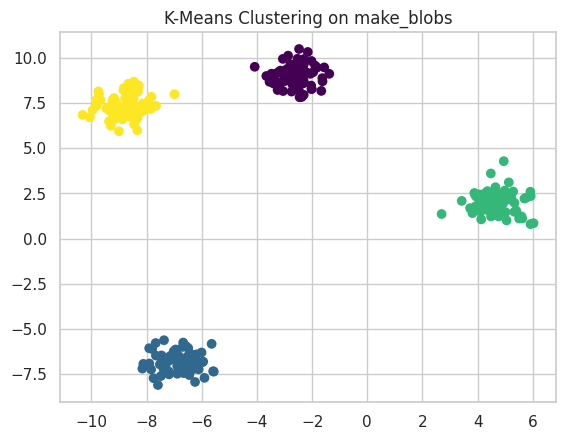

In [3]:
# 21.
X1, y1 = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)
kmeans1 = KMeans(n_clusters=4, random_state=42)
labels1 = kmeans1.fit_predict(X1)
plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], c=labels1, cmap='viridis')
plt.title("K-Means Clustering on make_blobs")
plt.show()

In [4]:
# 22.
iris = load_iris()
X_iris = iris.data
agg = AgglomerativeClustering(n_clusters=3)
labels_agg = agg.fit_predict(X_iris)
print("Agglomerative Clustering Labels (first 10):", labels_agg[:10])


Agglomerative Clustering Labels (first 10): [1 1 1 1 1 1 1 1 1 1]


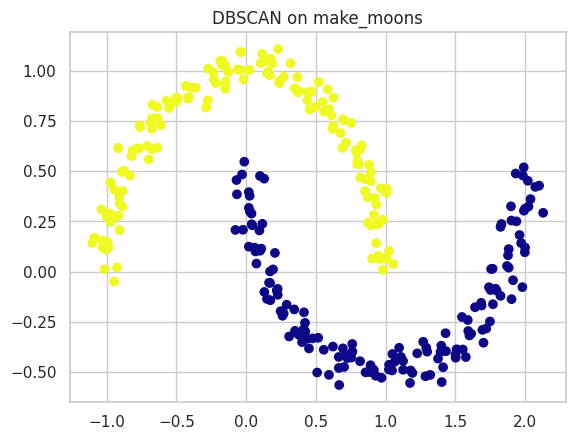

In [5]:
# 23.
X3, y3 = make_moons(n_samples=300, noise=0.05, random_state=42)
dbscan3 = DBSCAN(eps=0.2, min_samples=5)
labels3 = dbscan3.fit_predict(X3)
plt.figure()
plt.scatter(X3[:, 0], X3[:, 1], c=labels3, cmap='plasma')
plt.title("DBSCAN on make_moons")
plt.show()


In [6]:
# 24.
wine = load_wine()
X_wine = StandardScaler().fit_transform(wine.data)
kmeans_wine = KMeans(n_clusters=3, random_state=42)
labels_wine = kmeans_wine.fit_predict(X_wine)
(unique, counts) = np.unique(labels_wine, return_counts=True)
print("Wine Dataset Cluster Sizes:", dict(zip(unique, counts)))


Wine Dataset Cluster Sizes: {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


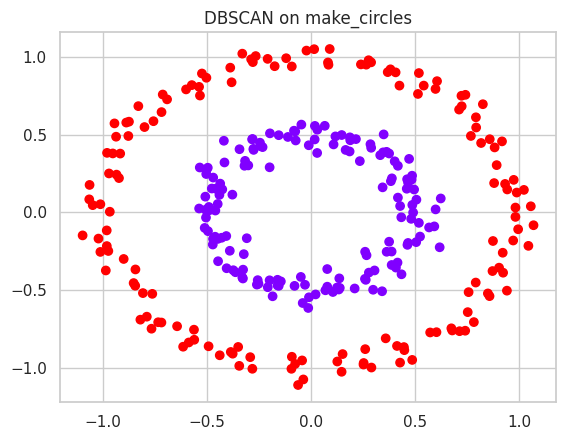

In [7]:
# 25
X5, y5 = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)
dbscan5 = DBSCAN(eps=0.2, min_samples=5)
labels5 = dbscan5.fit_predict(X5)
plt.figure()
plt.scatter(X5[:, 0], X5[:, 1], c=labels5, cmap='rainbow')
plt.title("DBSCAN on make_circles")
plt.show()


In [8]:
# 26
bc = load_breast_cancer()
X_bc = MinMaxScaler().fit_transform(bc.data)
kmeans_bc = KMeans(n_clusters=2, random_state=42)
kmeans_bc.fit(X_bc)
print("KMeans Cluster Centroids (Breast Cancer):\n", kmeans_bc.cluster_centers_)


KMeans Cluster Centroids (Breast Cancer):
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


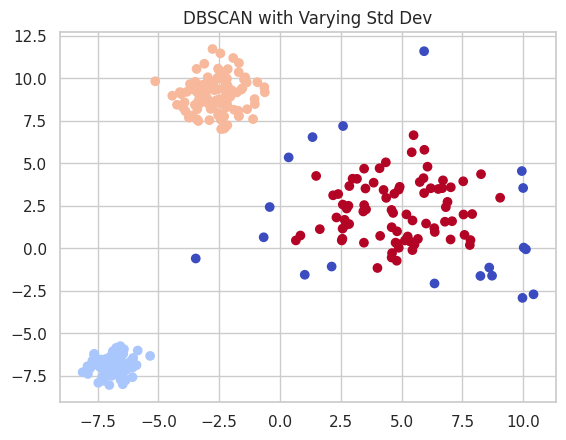

In [9]:
# 27
X7, y7 = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
dbscan7 = DBSCAN(eps=1.5, min_samples=5)
labels7 = dbscan7.fit_predict(X7)
plt.figure()
plt.scatter(X7[:, 0], X7[:, 1], c=labels7, cmap='coolwarm')
plt.title("DBSCAN with Varying Std Dev")
plt.show()


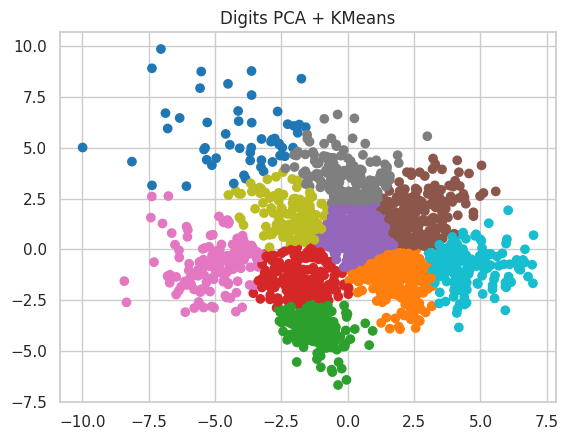

In [10]:

# 28
digits = load_digits()
X_digits = StandardScaler().fit_transform(digits.data)
X_pca = PCA(n_components=2).fit_transform(X_digits)
kmeans_digits = KMeans(n_clusters=10, random_state=42)
labels_digits = kmeans_digits.fit_predict(X_pca)
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_digits, cmap='tab10')
plt.title("Digits PCA + KMeans")
plt.show()


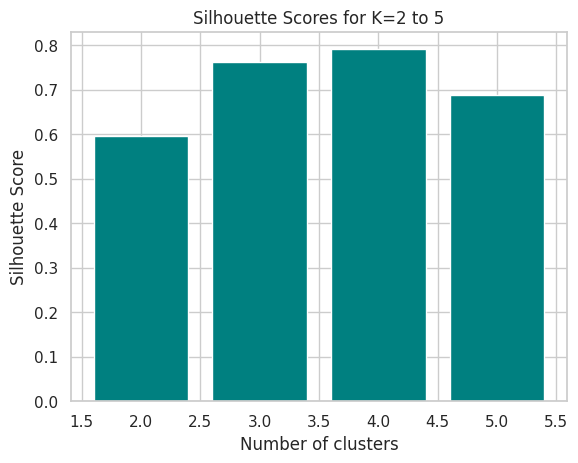

In [11]:
# 29
X9, _ = make_blobs(n_samples=500, centers=4, random_state=42)
scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X9)
    score = silhouette_score(X9, kmeans.labels_)
    scores.append(score)
plt.figure()
plt.bar(range(2, 6), scores, color='teal')
plt.title("Silhouette Scores for K=2 to 5")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()


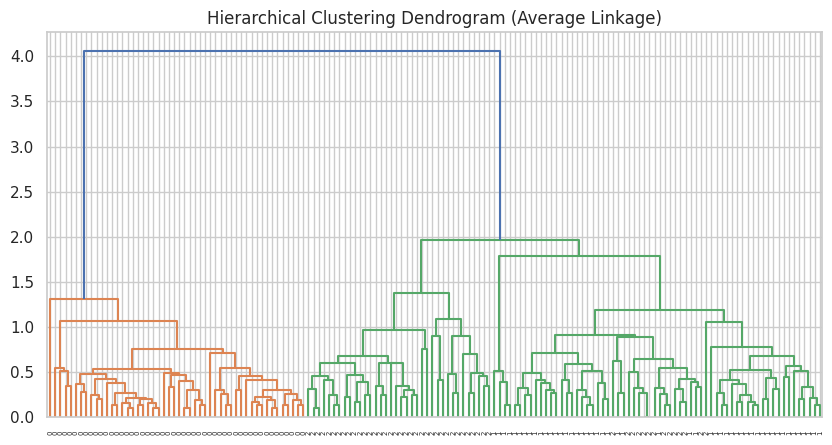

In [12]:
# 30
linked = linkage(X_iris, method='average')
plt.figure(figsize=(10, 5))
dendrogram(linked, labels=iris.target, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.show()


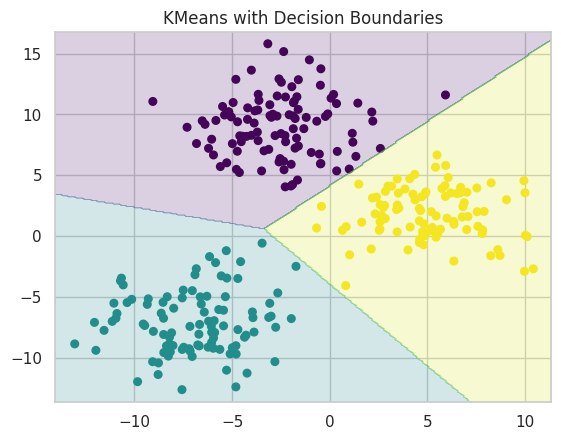

In [13]:
# 31
X1, y1 = make_blobs(n_samples=300, centers=3, cluster_std=2.5, random_state=42)
kmeans1 = KMeans(n_clusters=3, random_state=42).fit(X1)
labels1 = kmeans1.predict(X1)
plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], c=labels1, cmap='viridis', s=30)

# Decision boundary
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = kmeans1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
plt.title("KMeans with Decision Boundaries")
plt.show()

In [15]:
from sklearn.manifold import TSNE

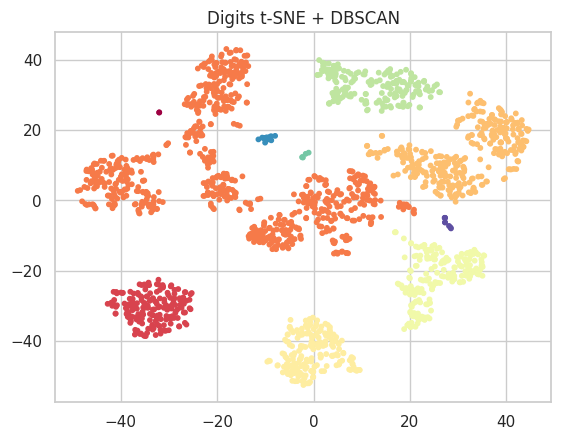

In [16]:
# 32
digits = load_digits()
X_digits = StandardScaler().fit_transform(digits.data)
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_digits)
labels2 = DBSCAN(eps=5, min_samples=5).fit_predict(X_tsne)
plt.figure()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels2, cmap='Spectral', s=10)
plt.title("Digits t-SNE + DBSCAN")
plt.show()


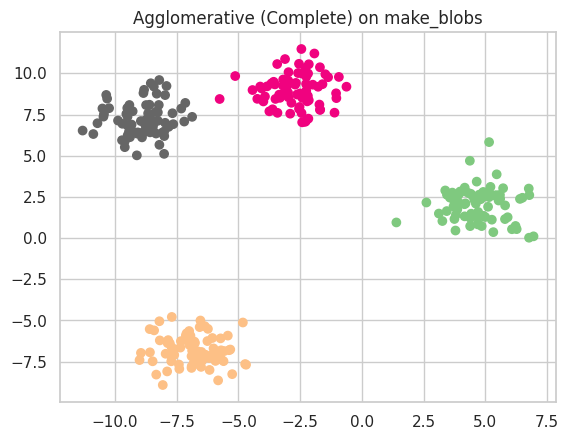

In [17]:
# 33
X3, y3 = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
agg3 = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels3 = agg3.fit_predict(X3)
plt.figure()
plt.scatter(X3[:, 0], X3[:, 1], c=labels3, cmap='Accent')
plt.title("Agglomerative (Complete) on make_blobs")
plt.show()


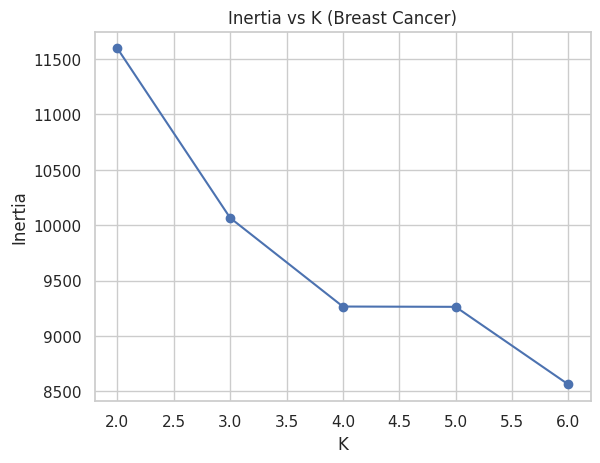

In [18]:
# 34
bc = load_breast_cancer()
X_bc = StandardScaler().fit_transform(bc.data)
inertias = []
K = range(2, 7)
for k in K:
    km = KMeans(n_clusters=k, random_state=42).fit(X_bc)
    inertias.append(km.inertia_)
plt.figure()
plt.plot(K, inertias, marker='o')
plt.title("Inertia vs K (Breast Cancer)")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()


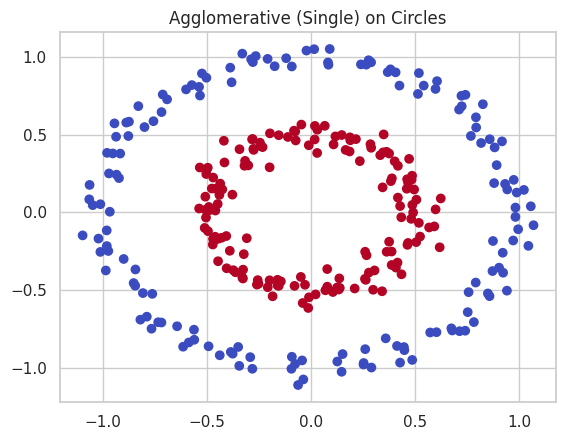

In [19]:
# 35
X5, y5 = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)
agg5 = AgglomerativeClustering(n_clusters=2, linkage='single')
labels5 = agg5.fit_predict(X5)
plt.figure()
plt.scatter(X5[:, 0], X5[:, 1], c=labels5, cmap='coolwarm')
plt.title("Agglomerative (Single) on Circles")
plt.show()


In [20]:
# 36
wine = load_wine()
X_wine = StandardScaler().fit_transform(wine.data)
labels6 = DBSCAN(eps=1.5, min_samples=5).fit_predict(X_wine)
n_clusters = len(set(labels6)) - (1 if -1 in labels6 else 0)
print(f"Wine Dataset DBSCAN Clusters (excluding noise): {n_clusters}")


Wine Dataset DBSCAN Clusters (excluding noise): 0


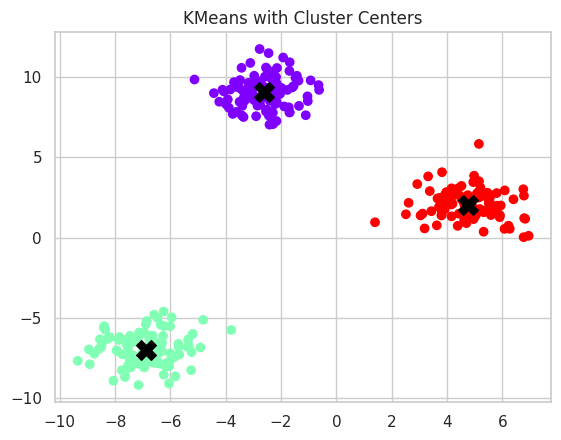

In [21]:
# 37
X7, _ = make_blobs(n_samples=300, centers=3, random_state=42)
kmeans7 = KMeans(n_clusters=3, random_state=42).fit(X7)
plt.figure()
plt.scatter(X7[:, 0], X7[:, 1], c=kmeans7.labels_, cmap='rainbow')
plt.scatter(kmeans7.cluster_centers_[:, 0], kmeans7.cluster_centers_[:, 1], s=200, c='black', marker='X')
plt.title("KMeans with Cluster Centers")
plt.show()


In [22]:
# 38
iris = load_iris()
X_iris = StandardScaler().fit_transform(iris.data)
labels8 = DBSCAN(eps=0.6, min_samples=5).fit_predict(X_iris)
n_noise = np.sum(labels8 == -1)
print(f"Iris DBSCAN Noise Samples: {n_noise}")


Iris DBSCAN Noise Samples: 26


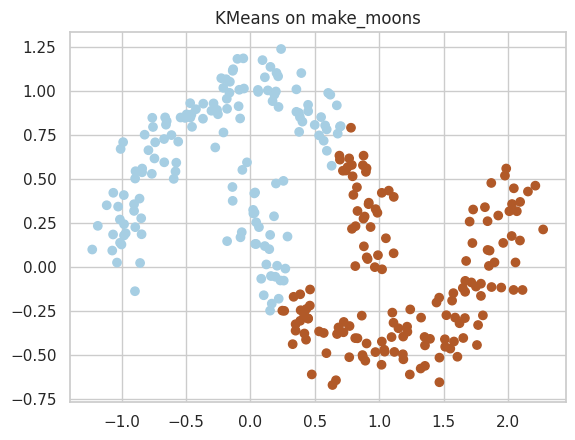

In [23]:
# 39
X9, y9 = make_moons(n_samples=300, noise=0.1, random_state=42)
kmeans9 = KMeans(n_clusters=2, random_state=42).fit(X9)
labels9 = kmeans9.labels_
plt.figure()
plt.scatter(X9[:, 0], X9[:, 1], c=labels9, cmap='Paired')
plt.title("KMeans on make_moons")
plt.show()


In [25]:
import plotly.express as px

In [26]:
# 40
X_digits3 = PCA(n_components=3).fit_transform(X_digits)
kmeans10 = KMeans(n_clusters=10, random_state=42).fit(X_digits3)
fig = px.scatter_3d(x=X_digits3[:, 0], y=X_digits3[:, 1], z=X_digits3[:, 2],
                    color=kmeans10.labels_.astype(str),
                    title="3D PCA + KMeans on Digits")
fig.show()


In [27]:
#41
X1, _ = make_blobs(n_samples=500, centers=5, cluster_std=1.0, random_state=42)
kmeans1 = KMeans(n_clusters=5, random_state=42).fit(X1)
score1 = silhouette_score(X1, kmeans1.labels_)
print(f"Silhouette Score for 5-cluster KMeans: {score1:.3f}")


Silhouette Score for 5-cluster KMeans: 0.679


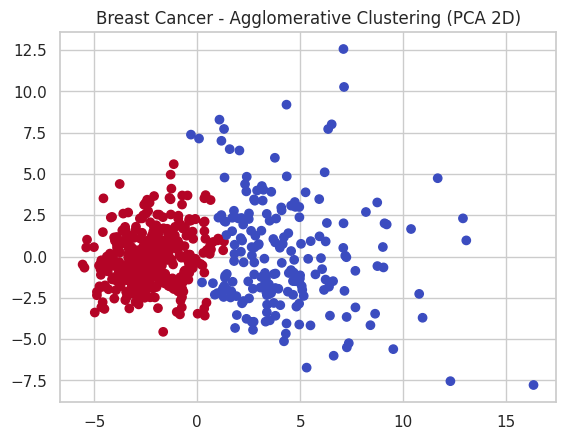

In [28]:
#42
bc = load_breast_cancer()
X_bc = StandardScaler().fit_transform(bc.data)
X_pca = PCA(n_components=2).fit_transform(X_bc)
agg2 = AgglomerativeClustering(n_clusters=2)
labels2 = agg2.fit_predict(X_pca)
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels2, cmap='coolwarm')
plt.title("Breast Cancer - Agglomerative Clustering (PCA 2D)")
plt.show()


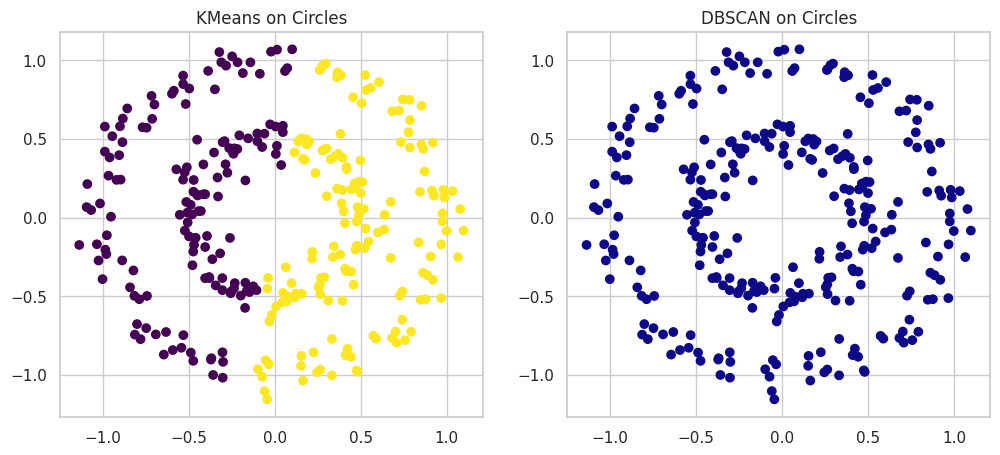

In [29]:
# 43
X3, _ = make_circles(n_samples=300, factor=0.5, noise=0.07, random_state=42)
kmeans3 = KMeans(n_clusters=2, random_state=42).fit(X3)
dbscan3 = DBSCAN(eps=0.2, min_samples=5).fit(X3)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(X3[:, 0], X3[:, 1], c=kmeans3.labels_, cmap='viridis')
axes[0].set_title("KMeans on Circles")
axes[1].scatter(X3[:, 0], X3[:, 1], c=dbscan3.labels_, cmap='plasma')
axes[1].set_title("DBSCAN on Circles")
plt.show()


In [31]:
from sklearn.metrics import silhouette_score, silhouette_samples

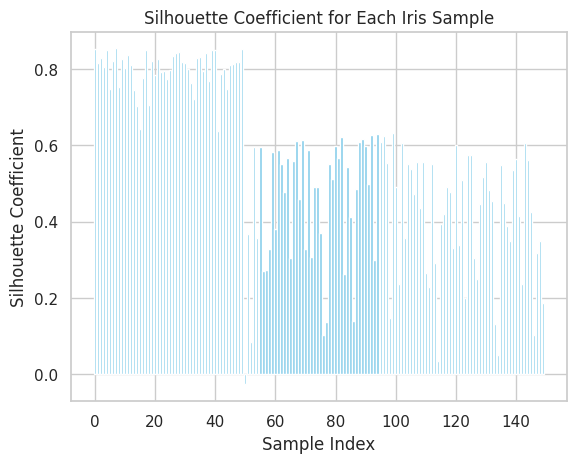

In [32]:
# 44
iris = load_iris()
X_iris = iris.data
kmeans4 = KMeans(n_clusters=3, random_state=42).fit(X_iris)
sil_samples = silhouette_samples(X_iris, kmeans4.labels_)

plt.figure()
plt.bar(range(len(sil_samples)), sil_samples, color='skyblue')
plt.title("Silhouette Coefficient for Each Iris Sample")
plt.xlabel("Sample Index")
plt.ylabel("Silhouette Coefficient")
plt.show()


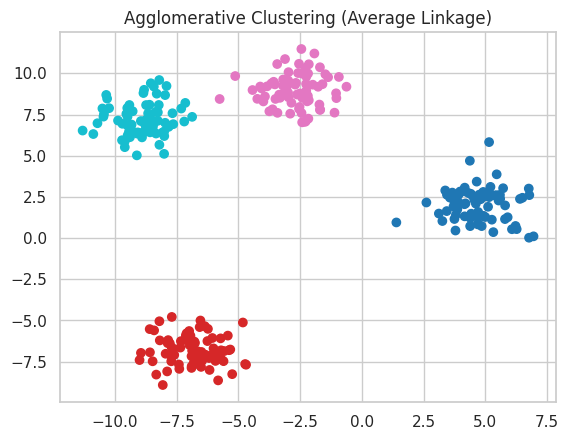

In [33]:
#45
X5, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
agg5 = AgglomerativeClustering(n_clusters=4, linkage='average')
labels5 = agg5.fit_predict(X5)
plt.figure()
plt.scatter(X5[:, 0], X5[:, 1], c=labels5, cmap='tab10')
plt.title("Agglomerative Clustering (Average Linkage)")
plt.show()


In [35]:
import pandas as pd

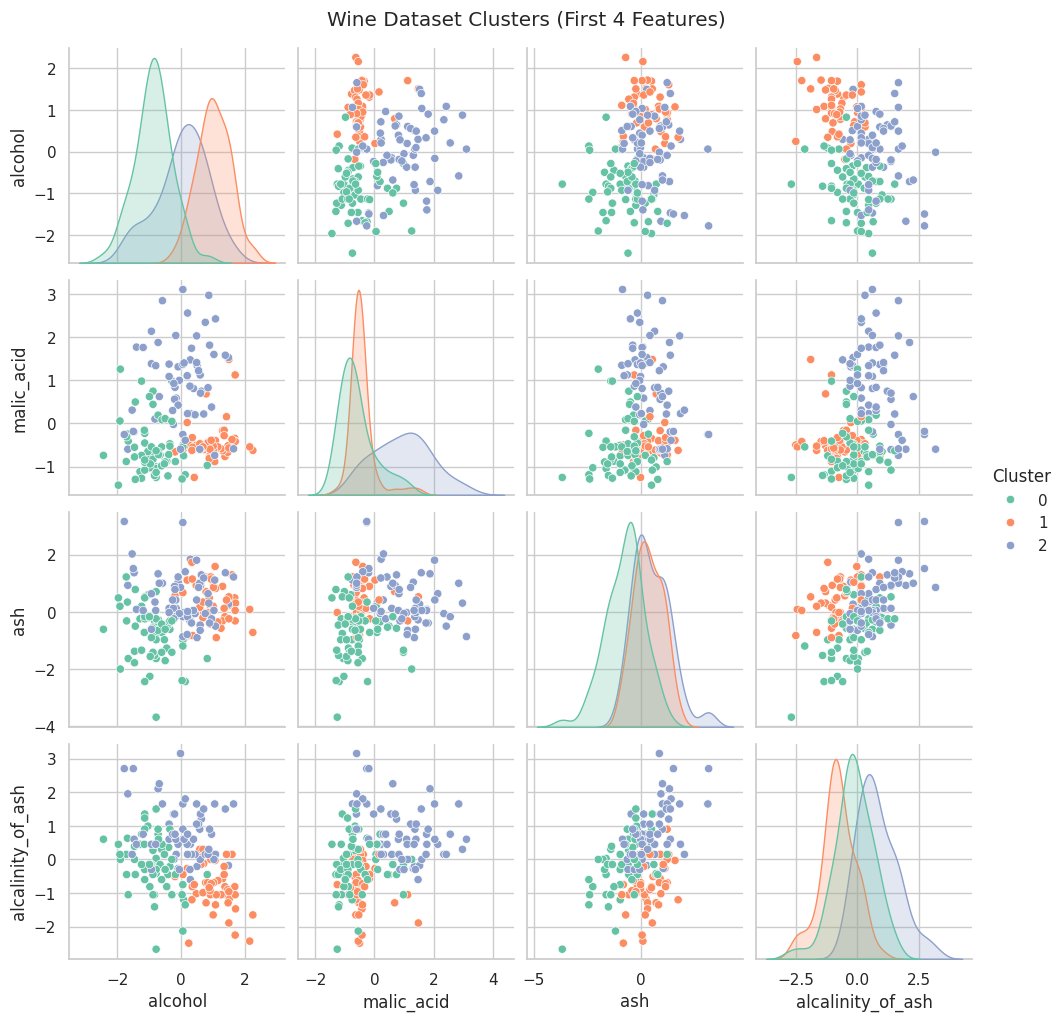

In [36]:
#46
wine = load_wine()
X_wine = wine.data[:, :4]  # First 4 features
X_wine_scaled = StandardScaler().fit_transform(X_wine)
kmeans6 = KMeans(n_clusters=3, random_state=42).fit(X_wine_scaled)
df_wine = pd.DataFrame(X_wine_scaled, columns=wine.feature_names[:4])
df_wine['Cluster'] = kmeans6.labels_
sns.pairplot(df_wine, hue='Cluster', palette='Set2')
plt.suptitle("Wine Dataset Clusters (First 4 Features)", y=1.02)
plt.show()


In [37]:
#48
X7, _ = make_blobs(n_samples=400, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
dbscan7 = DBSCAN(eps=1.2, min_samples=5).fit(X7)
labels7 = dbscan7.labels_
n_clusters7 = len(set(labels7)) - (1 if -1 in labels7 else 0)
n_noise7 = np.sum(labels7 == -1)
print(f"DBSCAN: Clusters = {n_clusters7}, Noise points = {n_noise7}")


DBSCAN: Clusters = 4, Noise points = 23


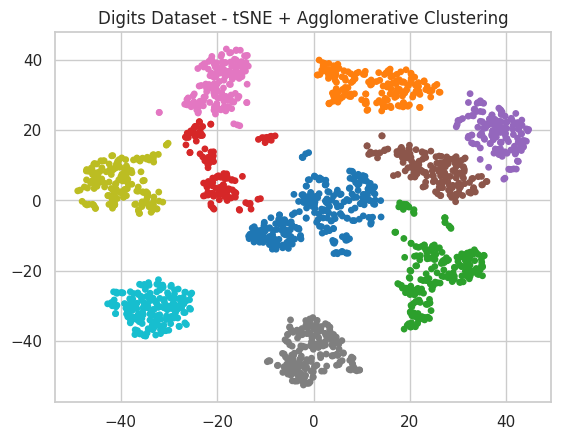

In [38]:
#48
digits = load_digits()
X_digits = StandardScaler().fit_transform(digits.data)
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_digits)
agg8 = AgglomerativeClustering(n_clusters=10).fit(X_tsne)
plt.figure()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=agg8.labels_, cmap='tab10', s=15)
plt.title("Digits Dataset - tSNE + Agglomerative Clustering")
plt.show()
